### 1. Problem defition
How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

### 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

### 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [161]:
df = pd.read_csv("data/bluebook-for-bulldozers/Train.csv", low_memory=False, parse_dates=["saledate"])

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [163]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

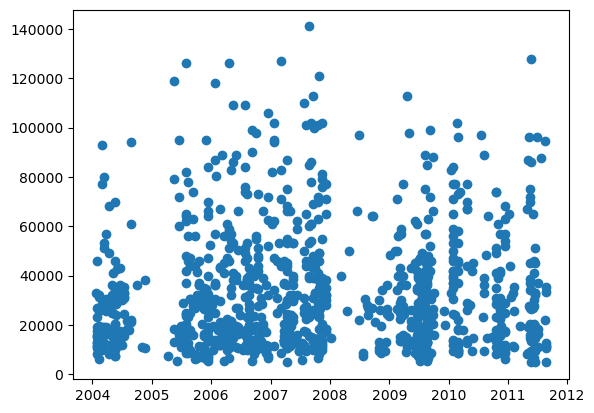

In [164]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

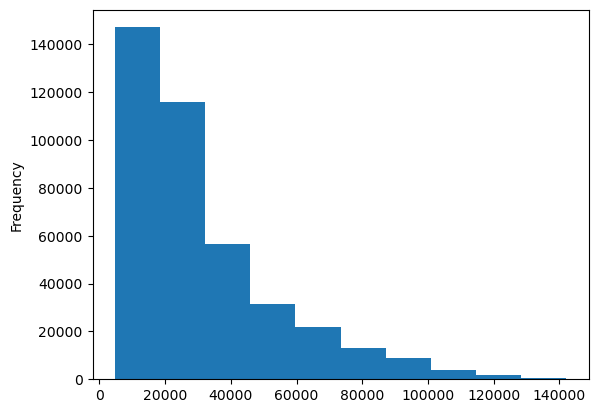

In [165]:
df["SalePrice"].plot.hist()

In [166]:
## Sort DataFrame by Saledate
df.sort_values(["saledate"], inplace=True, ascending=True)

In [167]:
df.saledate.head(20)

205615   1989-01-17
92803    1989-01-31
98346    1989-01-31
169297   1989-01-31
274835   1989-01-31
75378    1989-01-31
81383    1989-01-31
134080   1989-01-31
55455    1989-01-31
55454    1989-01-31
114830   1989-01-31
54653    1989-01-31
238373   1989-01-31
98567    1989-01-31
113454   1989-01-31
92780    1989-01-31
113390   1989-01-31
127000   1989-01-31
92833    1989-01-31
32138    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [168]:
df_tmp = df.copy()

In [169]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.day_of_year

In [170]:
df_tmp.saleYear.head(10)

205615    1989
92803     1989
98346     1989
169297    1989
274835    1989
75378     1989
81383     1989
134080    1989
55455     1989
55454     1989
Name: saleYear, dtype: int64

In [171]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 1

In [172]:
df_tmp.drop("saledate", axis=1, inplace=True)

## Convert strings to categories
One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

In [173]:
df_tmp.head().T

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1975,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,416,12G,644,A66


In [174]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [175]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [176]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [177]:
df_tmp.state.head(20)

205615      Texas
92803     Florida
98346     Florida
169297    Florida
274835    Florida
75378     Florida
81383     Florida
134080    Florida
55455     Florida
55454     Florida
114830    Florida
54653     Florida
238373    Georgia
98567     Florida
113454    Florida
92780     Florida
113390    Florida
127000    Florida
92833     Florida
32138     Florida
Name: state, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [178]:
df_tmp.state.cat.codes

205615    43
92803      8
98346      8
169297     8
274835     8
          ..
393123    31
397987    31
392664    31
400458    31
400217    31
Length: 401125, dtype: int8

In [179]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [180]:
df_tmp["fiSecondaryDesc"].value_counts(dropna=True)

C                43235
B                39203
G                36424
H                24050
E                21048
                 ...  
RC                   1
BLGPPS               1
R-2                  1
USBL                 1
 MSR SPIN ACE        1
Name: fiSecondaryDesc, Length: 175, dtype: int64

In [181]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [182]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [183]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

In [184]:
# Check if there's any null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [185]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

False    380989
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Filling and turning categorical values into numerical values

In [186]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              331486
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        137191
fiModelSeries                          344217
fiModelDescriptor                      329206
ProductSize                            210775
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           296764
Enclosure                                 325
Forks                             

In [187]:
# Turn Categorical variables into numbers
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        df_tmp[label] = pd.Categorical(content).codes+1

In [188]:
df_tmp.head().T

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,False,False


In [189]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Modelling

In [192]:
%%time
from sklearn.ensemble import RandomForestRegressor
#Instantiate model
model = RandomForestRegressor(n_jobs=-1,random_state=42)

#Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: total: 33min 6s
Wall time: 3min 16s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [193]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875209731205072

The above metric doesn't hold 

In [194]:
df_tmp["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [195]:
df_tmp1 = pd.read_csv("data/bluebook-for-bulldozers/Valid.csv", low_memory=False, parse_dates=["saledate"])

In [196]:
df_tmp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   11573 non-null  int64         
 1   MachineID                 11573 non-null  int64         
 2   ModelID                   11573 non-null  int64         
 3   datasource                11573 non-null  int64         
 4   auctioneerID              11573 non-null  int64         
 5   YearMade                  11573 non-null  int64         
 6   MachineHoursCurrentMeter  4739 non-null   float64       
 7   UsageBand                 4031 non-null   object        
 8   saledate                  11573 non-null  datetime64[ns]
 9   fiModelDesc               11573 non-null  object        
 10  fiBaseModel               11573 non-null  object        
 11  fiSecondaryDesc           8037 non-null   object        
 12  fiModelSeries     

In [197]:
df_tmp1.sort_values(["saledate"], inplace=True, ascending=True)
df_tmp1["saledate"]

4550    2012-01-01
4951    2012-01-04
7893    2012-01-04
7901    2012-01-04
4       2012-01-04
           ...    
11351   2012-04-28
8771    2012-04-28
8776    2012-04-28
4652    2012-04-28
9754    2012-04-28
Name: saledate, Length: 11573, dtype: datetime64[ns]

In [198]:
df_tmp1["saleYear"] = df_tmp1.saledate.dt.year
df_tmp1["saleMonth"] = df_tmp1.saledate.dt.month
df_tmp1["saleDay"] = df_tmp1.saledate.dt.day
df_tmp1["saleDayofWeek"] = df_tmp1.saledate.dt.day_of_week
df_tmp1["saleDayofYear"] = df_tmp1.saledate.dt.day_of_year

In [199]:
df_tmp1.drop("saledate", axis=1, inplace=True)

In [200]:
df_tmp1.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter     6834
UsageBand                    7542
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3536
fiModelSeries                9814
fiModelDescriptor            8676
ProductSize                  5830
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 8847
Enclosure                       9
Forks                        5935
Pad_Type                     9611
Ride_Control                 7451
Stick                        9611
Transmission                 6796
Turbocharged                 9611
Blade_Extension             10809
Blade_Width                 10809
Enclosure_Type              10809
Engine_Horsepo

In [201]:
for label,content in df_tmp1.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_tmp1[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp1[label] = content.fillna(content.median())

# Turn Categorical variables into numbers
for label,content in df_tmp1.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp1[label+"_is_missing"] = pd.isnull(content)
        df_tmp1[label] = pd.Categorical(content).codes+1            

In [202]:
df_tmp1.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [203]:
df_val = pd.read_csv("data/bluebook-for-bulldozers/ValidSolution.csv", low_memory=False)
df_val.head().T

,0,1,2,3,4
SalesID,1222837,1222839,1222841,1222843,1222845
SalePrice,31000.0,54000.0,26500.0,10000.0,35000.0
Usage,PublicTest,PublicTest,PublicTest,PublicTest,PublicTest


In [204]:
# Split data into train and test sets
x_train, y_train = df_tmp.drop(["SalePrice", "auctioneerID_is_missing"], axis=1), df_tmp.SalePrice
x_test, y_test =  df_tmp1, df_val.SalePrice

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((401125, 101), (401125,), (11573, 101), (11573,))

In [205]:
df_tmp1.auctioneerID

4550     99
4951     99
7893     99
7901     99
4         3
         ..
11351    99
8771     99
8776     99
4652     99
9754     99
Name: auctioneerID, Length: 11573, dtype: int64

### Building an evaluation function

According to Kaggle for the Bluebook for Bulldozers competition, the evaluation function they use is root mean squared log error (RMSLE).

RMSLE = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric you're going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2.

In [206]:
# Create Evaluation metrics
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.metrics import r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, val_preds)}
    return scores

## Testing our model on a subset(to tune hyperparameters)

In [207]:
model = RandomForestRegressor(n_jobs=-1,random_state=42, max_samples=10000)

In [208]:
%%time
#Cutting the run time by limiting the samples that are fitted in the model
model.fit(x_train, y_train)

CPU times: total: 1min 12s
Wall time: 7.27 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [209]:
show_scores(model)

{'Training MAE': 5556.874394689935,
 'Valid MAE': 25113.973798496503,
 'Training RMSLE': 0.2576603373982268,
 'Valid RMSLE': 0.9841613987792838,
 'Training R^2': 0.861141061931249,
 'Valid R^2': -0.6107618304239244}

In [210]:
## Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             n_iter=5,
                              cv=5,
                              verbose=True)

rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [211]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [212]:
show_scores(rs_model)

{'Training MAE': 6642.552971985559,
 'Valid MAE': 24100.763975160346,
 'Training RMSLE': 0.29803647946965717,
 'Valid RMSLE': 0.9236218753775085,
 'Training R^2': 0.8061936402473893,
 'Valid R^2': -0.4829316046471399}

### Train a model with the best Hyperparameters
Note: Found after *100* iterations of RandomizedSearchCV

In [370]:
ideal_model = RandomForestRegressor(n_estimators= 60,
 min_samples_split= 12,
 min_samples_leaf= 13,
 max_samples= 10000,
 max_features= 0.5,
 max_depth= None,
                                   random_state=42)

ideal_model.fit(x_train,y_train)

RandomForestRegressor(max_features=0.5, max_samples=10000, min_samples_leaf=13,
                      min_samples_split=12, n_estimators=60, random_state=42)

In [216]:
show_scores(ideal_model)

{'Training MAE': 6642.552971985559,
 'Valid MAE': 24100.763975160346,
 'Training RMSLE': 0.29803647946965717,
 'Valid RMSLE': 0.9236218753775085,
 'Training R^2': 0.8061936402473893,
 'Valid R^2': -0.4829316046471397}

In [217]:
show_scores(rs_model)

{'Training MAE': 6642.552971985559,
 'Valid MAE': 24100.763975160346,
 'Training RMSLE': 0.29803647946965717,
 'Valid RMSLE': 0.9236218753775085,
 'Training R^2': 0.8061936402473893,
 'Valid R^2': -0.4829316046471397}

## Make Predictions on data

In [518]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [519]:
df_test.sort_values(["saledate"], inplace=True, ascending=True)
df_test["saledate"]

1408    2012-05-01
1023    2012-05-01
1728    2012-05-01
1167    2012-05-01
1594    2012-05-01
           ...    
9941    2012-11-15
9936    2012-11-15
11620   2012-11-15
9995    2012-11-15
9803    2012-11-16
Name: saledate, Length: 12457, dtype: datetime64[ns]

In [520]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayOfYear"] = df.saledate.dt.day_of_year
    df = df.drop(["saledate"], axis=1)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [521]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True


In [522]:
set(df_test.columns)-set(x_train.columns)

{'saleDayOfWeek', 'saleDayOfYear'}

In [523]:
df_test.saleDayOfWeek

1408     1
1023     1
1728     1
1167     1
1594     1
        ..
9941     3
9936     3
11620    3
9995     3
9803     4
Name: saleDayOfWeek, Length: 12457, dtype: int64

In [524]:
x_train.saleDayofWeek

205615    1
92803     1
98346     1
169297    1
274835    1
         ..
393123    4
397987    4
392664    4
400458    4
400217    4
Name: saleDayofWeek, Length: 401125, dtype: int64

In [525]:
x_train.dtypes.value_counts()

bool       45
int8       40
int64      10
int16       4
float64     2
dtype: int64

In [526]:
df_test.dtypes.value_counts()

bool       45
int8       42
int64      11
int16       2
float64     1
dtype: int64

In [527]:
type_dct = {str(k): list(v) for k, v in df_test.groupby(df_test.dtypes, axis=1)}
type_dct

{'bool': ['MachineHoursCurrentMeter_is_missing',
  'UsageBand_is_missing',
  'fiModelDesc_is_missing',
  'fiBaseModel_is_missing',
  'fiSecondaryDesc_is_missing',
  'fiModelSeries_is_missing',
  'fiModelDescriptor_is_missing',
  'ProductSize_is_missing',
  'fiProductClassDesc_is_missing',
  'state_is_missing',
  'ProductGroup_is_missing',
  'ProductGroupDesc_is_missing',
  'Drive_System_is_missing',
  'Enclosure_is_missing',
  'Forks_is_missing',
  'Pad_Type_is_missing',
  'Ride_Control_is_missing',
  'Stick_is_missing',
  'Transmission_is_missing',
  'Turbocharged_is_missing',
  'Blade_Extension_is_missing',
  'Blade_Width_is_missing',
  'Enclosure_Type_is_missing',
  'Engine_Horsepower_is_missing',
  'Hydraulics_is_missing',
  'Pushblock_is_missing',
  'Ripper_is_missing',
  'Scarifier_is_missing',
  'Tip_Control_is_missing',
  'Tire_Size_is_missing',
  'Coupler_is_missing',
  'Coupler_System_is_missing',
  'Grouser_Tracks_is_missing',
  'Hydraulics_Flow_is_missing',
  'Track_Type_is

In [528]:
type_dc = {str(k): list(v) for k, v in x_train.groupby(x_train.dtypes, axis=1)}
type_dc

{'bool': ['MachineHoursCurrentMeter_is_missing',
  'UsageBand_is_missing',
  'fiModelDesc_is_missing',
  'fiBaseModel_is_missing',
  'fiSecondaryDesc_is_missing',
  'fiModelSeries_is_missing',
  'fiModelDescriptor_is_missing',
  'ProductSize_is_missing',
  'fiProductClassDesc_is_missing',
  'state_is_missing',
  'ProductGroup_is_missing',
  'ProductGroupDesc_is_missing',
  'Drive_System_is_missing',
  'Enclosure_is_missing',
  'Forks_is_missing',
  'Pad_Type_is_missing',
  'Ride_Control_is_missing',
  'Stick_is_missing',
  'Transmission_is_missing',
  'Turbocharged_is_missing',
  'Blade_Extension_is_missing',
  'Blade_Width_is_missing',
  'Enclosure_Type_is_missing',
  'Engine_Horsepower_is_missing',
  'Hydraulics_is_missing',
  'Pushblock_is_missing',
  'Ripper_is_missing',
  'Scarifier_is_missing',
  'Tip_Control_is_missing',
  'Tire_Size_is_missing',
  'Coupler_is_missing',
  'Coupler_System_is_missing',
  'Grouser_Tracks_is_missing',
  'Hydraulics_Flow_is_missing',
  'Track_Type_is

In [529]:
set(type_dct["int8"])-set(type_dc["int8"])

{'fiModelDescriptor', 'fiSecondaryDesc'}

In [530]:
set(type_dct["int64"])-set(type_dc["int64"])

{'auctioneerID', 'saleDayOfWeek', 'saleDayOfYear'}

In [531]:
set(type_dc["int16"])-set(type_dct["int16"])

{'fiModelDescriptor', 'fiSecondaryDesc'}

In [532]:
set(type_dc["float64"])-set(type_dct["float64"])

{'auctioneerID'}

In [533]:
df_test["auctioneerID1"] = df_test.auctioneerID.astype("float64")

In [534]:
df_test.drop(columns=["auctioneerID"], inplace=True)

In [535]:
df_test.rename(columns={'auctioneerID1': 'auctioneerID'}, inplace=True)

In [536]:
df_test.head().T

,1408,1023,1728,1167,1594
SalesID,4317459,4249784,4392603,4274831,4362801
MachineID,2295526,1745722,2283116,2288988,2300591
ModelID,8132,3178,18111,3783,16490
datasource,172,172,172,172,172
YearMade,1998,1995,2004,2001,2006
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,True,True,False,True
Steering_Controls_is_missing,True,True,True,False,True


In [537]:
df_test["fiModelDescriptor1"] = df_test.fiModelDescriptor.astype("int16")
df_test["fiSecondaryDesc"] = df_test.fiSecondaryDesc.astype("int16")

In [538]:
df_test.drop(columns=["fiModelDescriptor"], inplace=True)

In [539]:
df_test.rename(columns={'fiModelDescriptor1': 'fiModelDescriptor'}, inplace=True)

In [540]:
df_test.fiModelDescriptor

1408      0
1023      0
1728      0
1167      0
1594      0
         ..
9941      0
9936      0
11620    33
9995      0
9803      0
Name: fiModelDescriptor, Length: 12457, dtype: int16

In [541]:
df_test.dtypes.value_counts()

bool       45
int8       40
int64      10
int16       4
float64     2
dtype: int64

In [542]:
x_train.dtypes.value_counts()

bool       45
int8       40
int64      10
int16       4
float64     2
dtype: int64

In [556]:
type_dct = {str(k): list(v) for k, v in df_test.groupby(df_test.dtypes, axis=1)}
type_dct

{'bool': ['MachineHoursCurrentMeter_is_missing',
  'UsageBand_is_missing',
  'fiModelDesc_is_missing',
  'fiBaseModel_is_missing',
  'fiSecondaryDesc_is_missing',
  'fiModelSeries_is_missing',
  'fiModelDescriptor_is_missing',
  'ProductSize_is_missing',
  'fiProductClassDesc_is_missing',
  'state_is_missing',
  'ProductGroup_is_missing',
  'ProductGroupDesc_is_missing',
  'Drive_System_is_missing',
  'Enclosure_is_missing',
  'Forks_is_missing',
  'Pad_Type_is_missing',
  'Ride_Control_is_missing',
  'Stick_is_missing',
  'Transmission_is_missing',
  'Turbocharged_is_missing',
  'Blade_Extension_is_missing',
  'Blade_Width_is_missing',
  'Enclosure_Type_is_missing',
  'Engine_Horsepower_is_missing',
  'Hydraulics_is_missing',
  'Pushblock_is_missing',
  'Ripper_is_missing',
  'Scarifier_is_missing',
  'Tip_Control_is_missing',
  'Tire_Size_is_missing',
  'Coupler_is_missing',
  'Coupler_System_is_missing',
  'Grouser_Tracks_is_missing',
  'Hydraulics_Flow_is_missing',
  'Track_Type_is

In [544]:
type_dc = {str(k): list(v) for k, v in x_train.groupby(x_train.dtypes, axis=1)}
type_dc

{'bool': ['MachineHoursCurrentMeter_is_missing',
  'UsageBand_is_missing',
  'fiModelDesc_is_missing',
  'fiBaseModel_is_missing',
  'fiSecondaryDesc_is_missing',
  'fiModelSeries_is_missing',
  'fiModelDescriptor_is_missing',
  'ProductSize_is_missing',
  'fiProductClassDesc_is_missing',
  'state_is_missing',
  'ProductGroup_is_missing',
  'ProductGroupDesc_is_missing',
  'Drive_System_is_missing',
  'Enclosure_is_missing',
  'Forks_is_missing',
  'Pad_Type_is_missing',
  'Ride_Control_is_missing',
  'Stick_is_missing',
  'Transmission_is_missing',
  'Turbocharged_is_missing',
  'Blade_Extension_is_missing',
  'Blade_Width_is_missing',
  'Enclosure_Type_is_missing',
  'Engine_Horsepower_is_missing',
  'Hydraulics_is_missing',
  'Pushblock_is_missing',
  'Ripper_is_missing',
  'Scarifier_is_missing',
  'Tip_Control_is_missing',
  'Tire_Size_is_missing',
  'Coupler_is_missing',
  'Coupler_System_is_missing',
  'Grouser_Tracks_is_missing',
  'Hydraulics_Flow_is_missing',
  'Track_Type_is

In [545]:
set(type_dct["int8"])-set(type_dc["int8"])

set()

In [553]:
df_test.rename(columns={'saleDayOfWeek': 'saleDayofWeek','saleDayOfYear': 'saleDayofYear'}, inplace=True)

In [558]:
df_test = df_test[x_train.columns]

In [559]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [560]:
test_preds

array([10495.42795912, 19849.55145192, 21721.93873256, ...,
       49248.02043635, 41363.04632589, 35733.65111063])

In [561]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
1408,4317459,10495.427959
1023,4249784,19849.551452
1728,4392603,21721.938733
1167,4274831,32217.982295
1594,4362801,14925.892723
...,...,...
9941,6620191,11116.753171
9936,6620142,12253.246603
11620,6635116,49248.020436
9995,6621460,41363.046326


In [562]:
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

## Feature Importance

In [563]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([2.53644842e-02, 2.56542808e-02, 4.50603654e-02, 1.33645406e-03,
       1.57761349e-03, 2.00488839e-01, 1.27245510e-03, 5.01037067e-04,
       3.82191460e-02, 2.41754697e-02, 6.96229404e-02, 3.45340331e-03,
       2.54810750e-02, 1.59118624e-01, 4.47761009e-02, 2.77483148e-03,
       3.61412152e-03, 5.47800552e-03, 3.21394327e-03, 9.30322592e-02,
       2.28026803e-04, 1.78128710e-04, 9.85740315e-04, 6.11487817e-04,
       1.01907995e-03, 6.88769272e-05, 2.43573831e-03, 1.68828659e-02,
       1.17390844e-03, 2.93095611e-03, 2.26195148e-03, 1.94852973e-03,
       6.72721540e-03, 2.13450956e-04, 3.36499212e-03, 1.96024292e-02,
       1.07673732e-03, 1.60894500e-02, 2.69374419e-03, 1.36773775e-03,
       2.17543038e-03, 8.49817874e-04, 8.21057111e-04, 7.82973893e-04,
       4.05468272e-04, 2.26815758e-04, 4.06428987e-04, 4.02452920e-03,
       4.65760032e-04, 2.00107427e-04, 5.22585416e-04, 4.80115703e-02,
       1.68566332e-03, 2.40459286e-03, 1.15159336e-03, 4.41565615e-03,
      

In [565]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

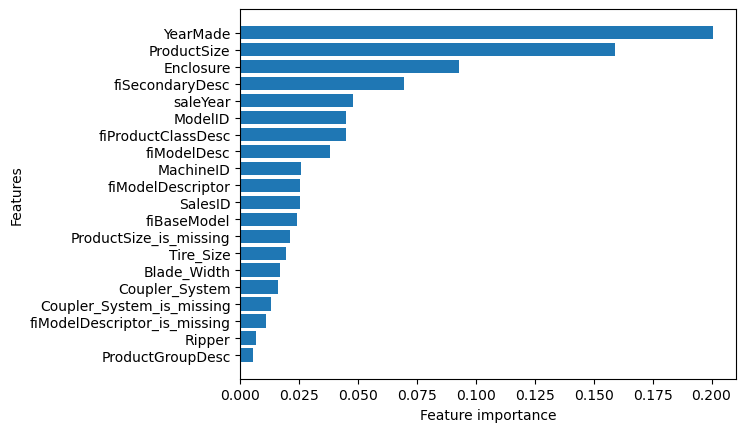

In [567]:
plot_features(x_train.columns, ideal_model.feature_importances_)

In [568]:
df["YearMade"].value_counts()

1000    38185
1998    21221
2005    20587
2004    20020
1997    18905
        ...  
1937        1
1949        1
1947        1
2012        1
2013        1
Name: YearMade, Length: 72, dtype: int64